In [24]:
# libraries/packages
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl # for dracula color cycle
import scienceplots

plt.style.use(['science', 'no-latex'])
colorcycle = ['#8be9fd', '#ff79c6', '#50fa7b', '#bd93f9', '#ffb86c', '#ff5555', '#f1fa8c', 
'#6272a4']
dred = colorcycle[-3]
dgrey = colorcycle[-1]
plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorcycle)

# change dpi 
plt.rcParams['figure.dpi'] = 256 # pixel density
plt.rcParams['savefig.dpi'] = 1024 # optional

1.00119 0.998807


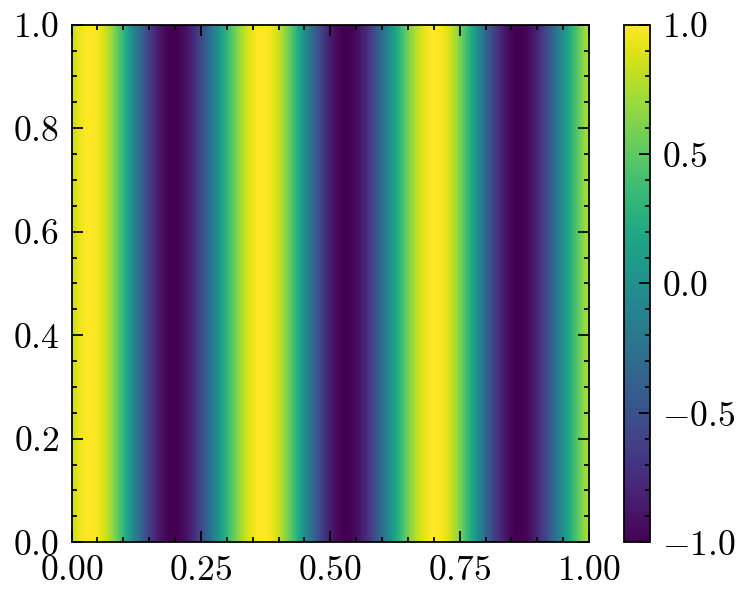

In [208]:
# First frame test
# load data
relpath = './data/sound_wave/'
data = np.loadtxt(relpath + 'output_rho_99.csv', delimiter=',')

# print(data.shape)

# find max and min
max_val = np.max(data)
min_val = np.min(data)
print(max_val, min_val)
# normalize data from -1 to 1
data = (data - min_val) / (max_val - min_val) * 2.0 - 1

plt.imshow(data, cmap='viridis', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()

In [82]:
# sound_wave png generator
dt = 0.01

fig, ax = plt.subplots()
for n in range(100):
    print(n)
    t = n * dt
    data = np.loadtxt(relpath + f"output_rho_{n}.csv", delimiter=",")
    data = (data - min_val) / (max_val - min_val) * 2.0 - 1

    ax.clear()
    im = ax.imshow(data, cmap='viridis', origin='lower', extent=[0, 1, 0, 1])
    ax.set_title(r'$\rho - \rho_0$', loc='left')
    ax.set_title(f"$t$ = {t:.2f}", loc='right')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    if n == 0:
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_ticks([-1.0, -0.5, 0.0, 0.5, 1.0])
    plt.savefig(relpath + f'sound_wave_{n:03d}.png')

plt.close()

# NOTE: RUN THIS IN TERMINAL
# ffmpeg -framerate 10 -i ./data/sound_wave/sound_wave_%03d.png -c:v libx264 -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -pix_fmt yuv420p sound_wave.mp4

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


1.2909944487358056
0.0012895321899087685
0.00390625
1.2987012987012987
0.007751937984496131


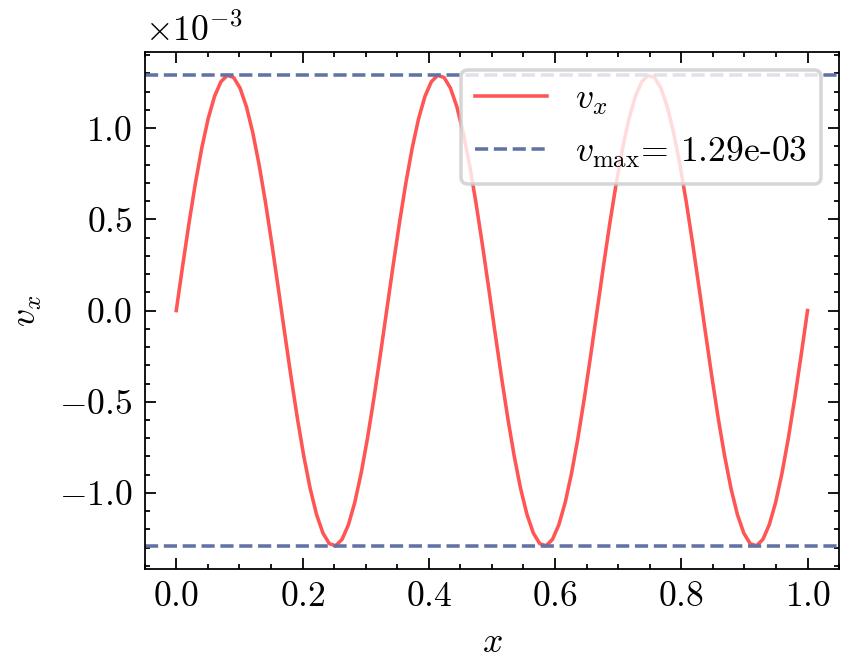

In [158]:
# wave speed c = sqrt(gamma * P0 / rho0)
# vx = c rho1 / rho0
x = np.linspace(0, 1, 100)
gamma = 5.0 / 3.0
P0 = 1.0
rho0 = 1.0
rho1 = 1e-3 * np.sin(6.0 * np.pi * x)
c = np.sqrt(gamma * P0 / rho0)
print(c)
vx = c * rho1 / rho0
vmax = np.max(np.abs(vx))
plt.plot(x, vx, color=dred, label=r'$v_x$')
plt.xlabel(r'$x$')
plt.ylabel(r'$v_x$')
# add vmax
plt.axhline(vmax, color=dgrey, linestyle='--', label=r'$v_{\max}$' + f'= {vmax:.2e}')
plt.axhline(-vmax, color=dgrey, linestyle='--')
print(vmax)
#ylim in scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='upper right', frameon=True)
print(1.0 / 256.0)
print(1.0 / 0.77)
print((1.30 - 1.29) / 1.29)

In [70]:
# dt data
t, dt = np.loadtxt(relpath + 'dt_output.csv', delimiter=',', unpack=True)
# dx = dy =  Lx / (Nx - 2) 
dx = 1.0 / (258 - 2)
# print(dx)
# CMAX = vmax * dt / dx
print(vmax)
print(dt[1])
print(dx)
c = vmax * 1000.0  * dt[1] / dx
print(c)
cmax = 1.0 / np.sqrt(2) * dt[1] / dx
print(cmax)

0.0012895321899087685
0.0012087
0.00390625
0.39901633483333854
0.21879807140356608


1.01615 0.983244


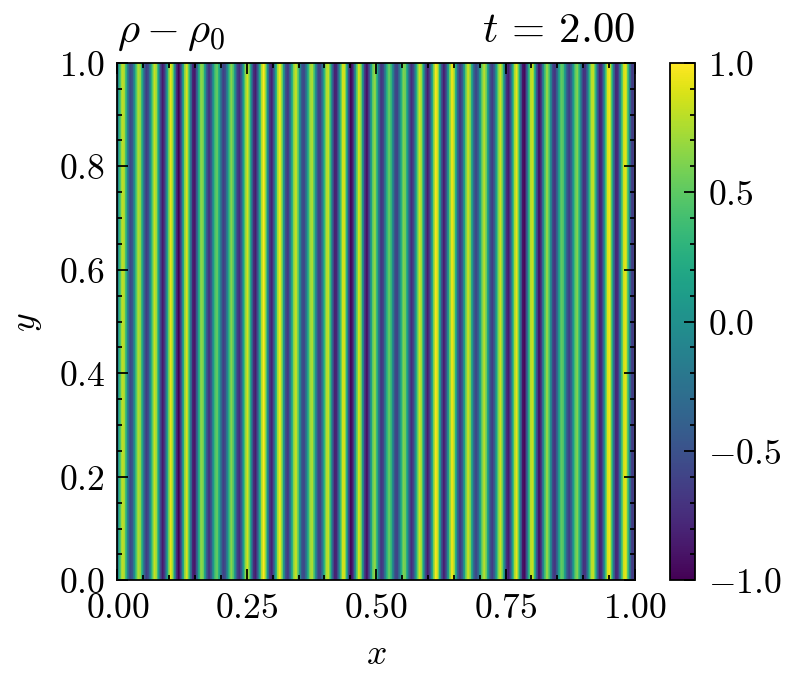

In [ ]:
# cmax_output_rho_%d.csv
time = 200
data1 = np.loadtxt(relpath + f'cmax_output_rho_{time}.csv', delimiter=',')
t = time / 100
# print(data.shape)

# find max and min
max_val = np.max(data1)
min_val = np.min(data1)
print(max_val, min_val)
# normalize data from -1 to 1
data1 = (data1 - min_val) / (max_val - min_val) * 2.0 - 1

fig, ax = plt.subplots()
im = ax.imshow(data1, cmap='viridis', origin='lower', extent=[0, 1, 0, 1])
ax.set_title(r'$\rho - \rho_0$', loc='left')
ax.set_title(f"$t$ = {t:.2f}", loc='right')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
cbar = fig.colorbar(im, ax=ax)
cbar.set_ticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.savefig(relpath + f'cmax_output_rho_unstable.png')
# plt.savefig(relpath + f'cmax_output_rho_c4_t200.png')

In [ ]:
# sw_wave png generator
dt = 0.01

fig, ax = plt.subplots()
for n in range(100):
    print(n)
    t = n * dt
    data = np.loadtxt(relpath + f"cmax_output_rho_{n}.csv", delimiter=",")
    data = (data - min_val) / (max_val - min_val) * 2.0 - 1

    ax.clear()
    im = ax.imshow(data, cmap='viridis', origin='lower', extent=[0, 1, 0, 1])
    ax.set_title(r'$\rho - \rho_0$', loc='left')
    ax.set_title(f"$t$ = {t:.2f}", loc='right')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    if n == 0:
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_ticks([-1.0, -0.5, 0.0, 0.5, 1.0])
    plt.savefig(relpath + f'cmax_sound_wave_{n:03d}.png')

plt.close()

# NOTE: RUN THIS IN TERMINAL
# ffmpeg -framerate 10 -i ./data/sound_wave/sound_wave_%03d.png -c:v libx264 -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -pix_fmt yuv420p sound_wave.mp4